# Timestepping Demo (Mass on a spring with damping)
## Introduction
In this demo, we will consider a mass on a horizontal surface attached to a spring. We will give the mass an initial position and velocity, then we will let Newton's Laws and Calculus do the rest. In class, we learned that the mass will oscillate about the spring's equilibrium point, but realistically, we expect the oscillation to evenually diminish due to friction between the mass and the floor. In this demo, we will include friction by choosing a value for $\mu_k$.

The forces acting on the mass in the horizontal are:  
&nbsp;&nbsp;&nbsp;&nbsp; the spring force = $Fsp = -k x$, and  
&nbsp;&nbsp;&nbsp;&nbsp; the friction force = $Fk = \mu_k m g \hat{v}$,  
where  
&nbsp;&nbsp;&nbsp;&nbsp; $k$ = the spring constant,  
&nbsp;&nbsp;&nbsp;&nbsp; $x$ = the horizontal distance from the equilibrium point of the spring,  
&nbsp;&nbsp;&nbsp;&nbsp; $\mu_k$ = the coefficient of kinetic friction,  
&nbsp;&nbsp;&nbsp;&nbsp; $m$ = mass,  
&nbsp;&nbsp;&nbsp;&nbsp; $g$ = free-fall acceleration = 9.80 m/s$^2$,  
&nbsp;&nbsp;&nbsp;&nbsp; $\hat{v}$ = the unit velocity vector (note that $-\hat{v}$ opposes the motion).

## Setup
As usual, we first import the tools we plan to use.

In [30]:
import numpy as np                  # For NumPy arrays and pi.
import matplotlib.pyplot as plot    # For creating plots of our data.

Next, we set some basic variables like $m$ and $k$. We also decide how many points we will plot by setting the $T$ and $dt$.

In [31]:
dt  = 0.001;   # The timestep.
T   = 10.0;    # The final time value
m   = 5.0;     # The mass
k   = 250.0;   # The spring constant
muk = 0.01;    # The coefficient of kinetic friction.
x0  = 0.05;    # The initial position.
v0  = 0.0;     # The initial velocity.
g   = 9.80;    # The free-fall acceleration. (Go ahead, mess with gravity.)

We need to keep track of $x$ and $v$ of the mass as time marches along. To do this, we will create some arrays. To start, we will just fill these arrays with zeros, but as we let the system evolve, we will replace the zeros with our results. These arrays will be named with an 'arr' at the end so that we know it is an array.

In [32]:
tarr = np.arange(0.0, T + dt, dt) # The time at each step.
N    = tarr.size         # This is the number of timesteps we will perform.
xarr = np.zeros(N)       # Position values at each timestep (set to 0 for now).
varr = np.zeros(N)       # Velocity values at each timestep (set to 0 for now).
Earr = np.zeros(N)       # Energy values at each timestep (set to 0 for now).

## Timestepping
In this section, we will start with the initial values, $x_0$ and $v_0$, and let the spring and friction forces act for a very small time $dt$. This will produce a new set of $x$ and $v$ values. Then, we will let the forces act again for another timestep and so on until we know $x$ and $v$ at the final time $T$.

Newton's Second Law for this system is $ma = -kx - \mu_k m g \hat{v}$. This is not the most convenient form for us. Instead, we will split the equation into two parts:  
&nbsp;&nbsp;&nbsp;&nbsp; $dx/dt = v$  
&nbsp;&nbsp;&nbsp;&nbsp; $dv/dt = -(k/m)*x - \mu_k g \hat{v}.$  
Note that this is identical to Newton's Second Law. The main difference is that we can now multiply by $dt$:  
&nbsp;&nbsp;&nbsp;&nbsp; $dx = v\,dt$  
&nbsp;&nbsp;&nbsp;&nbsp; $dv = (-(k/m) x - \mu_k g \hat{v}) dt$.  
This tells us how $x$ and $v$ change each time we advance by $dt$. So, if we have an initial $x$ and $v$, and we compute $dx$ and $dv$, then the new values of $x$ and $v$ are simply $x+dx$ and $v+dv$.

Remember, $dt$ **MUST** be small. Technically $dt$ is a differential, meaning it must be infinitesimally small if our timestepping scheme is going to produce an exact solution. When we let the system evolve on the computer, we are not after the exact solution, just an approximate solution. So just keep $dt$ small. How small?? Well, that's an interesting question thast we will discuss in class. So for now, let's just say small. If the mass's position becomes unphysically large, then you probably need to reduce your $dt$ and try again.

We do not want to perform this calculation by hand thousands of times until we arrive at our final time, so we will let the computer do it for us. We do this with someting called a for-loop. It works like this, suppose we want to add up all numbers between 1 and 10. The long way to do this is by adding every number explicitly:  
```
sum = 0        # Start with nothing  
sum = sum + 1  # Add the first number, 1.  
sum = sum + 2  # Add the next number, 2.  
sum = sum + 3  # Add the next number, 3.  
sum = sum + 4  # Add the next number, 4.  
sum = sum + 5  # Add the next number, 5.  
sum = sum + 6  # Add the next number, 6.  
sum = sum + 7  # Add the next number, 7.  
sum = sum + 8  # Add the next number, 8.  
sum = sum + 9  # Add the next number, 9.  
sum = sum + 1; # Add the last number, 10.  
```
Now, if you check, sum will equal 55, the correct value. This is a pain. Instead, we could have done this with a for-loop: 
```
sum = 0;             # Start with nothing.
for i = range(1,11): # Let i start with 1 and stop before reaching 11.
    sum = sum + i    # Add the current value of i.
```
Now, if you check, sum will again equal 55. This is much easier. And this for-loop is how we will let the computer add all $N$ increments $dx$ and $dv$.

Okay, here we go! Let's begin at $t=0$. We will compute some things we will need and store the $x$ and $v$ values in the first element of the `xarr` and `varr` arrays. Additionally, we will keep track of the energy in the `Earr` array.

In [33]:
x = x0
v = v0
vhat = np.sign(v)
xarr[0] = x
varr[0] = v
Earr[0] = 0.5*m*v**2 + 0.5*k*x**2

Next, we will use a for-loop to find the area of each rectangle (integrate $F(t)/m$ from $0$ to $T$).

In [34]:
for i in range(1,N):
    # Compute the increments.
    vhat = np.sign(v)
    dx = v*dt
    dv = (-(k/m)*x - muk*g*vhat)*dt
    
    # Update the current position and velocity. 
    x = x + dx
    v = v + dv
      
    # Put the results into the arrays
    xarr[i] = x
    varr[i] = v
    Earr[i] = 0.5*m*v**2 + 0.5*k*x**2

## Plotting the results
Finally, we use python to create 3 plots: $x-t$, $v-t$, and $E-t$.

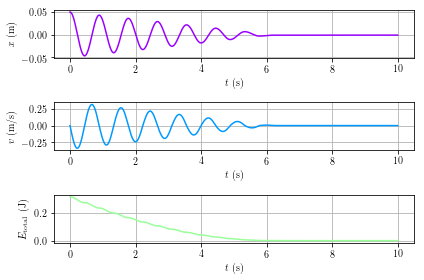

In [35]:
plot.rc('text', usetex=False)
plot.rc('font', family='serif')

fig = plot.figure()

f1 = plot.subplot(311)
plot.plot(tarr, xarr, color=(0.6, 0, 1.0))
ax = plot.gca()
ax.grid()
ax.set_ylabel("x (m)")
ax.set_xlabel("t (s)")
 
f2 = plot.subplot(312)
plot.plot(tarr, varr, color=(0.0, 0.6, 1.0))
ax = plot.gca()
ax.grid()
ax.set_ylabel("v (m/s)")
ax.set_xlabel("t (s)")

f3 = plot.subplot(313)
plot.plot(tarr, Earr, color=(0.6, 1.0, 0.6))
ax = plot.gca()
ax.grid()
ax.set_ylabel("E (J)")
ax.set_xlabel("t (s)")
 
plot.tight_layout()
plot.show()
fig.savefig("mass_spring_plots.png", dpi=300)

## Final notes
Try running this with $\mu_k = 0$. In theory, your energy should be constant since you removed the friction. Is that what you see?

The timestepping scheme we are using was invented by Euler, so it is called the "Forward Euler" timestepping scheme. Unfortunately, it is unstable because it tries to add energy to the system. You can make this unwanted effect smaller by reducing dt (try it!), but it will never go away.

Alternatively, you can add some artificial dissipation by increasing $\mu_k$. If you add just the right amount to muk, you can remove the energy that the Forward Euler scheme added. Many people do this, but there is a better way to fix the problem - use a stable timestepping scheme. There are many, many timestepping schemes out there and many are known to conserve energy. For example, try replacing lines 4 and 5 in the timestepping loop with this:
```
    xmid = x + v*dt/2
    dv = (-(k/m)*xmid - muk*g*vhat)*dt
    dx = (v + dv/2) * dt
```
How does this work?! Well, basically we are doing a better job of finding the area of each rectangle in the Reimann sum by evaluating $F(t)/m$ at the midpoints of each rectangle rather than the left side.